In [ ]:
from PIL import Image
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image=Image.open('/content/Screenshot 2025-05-30 214414.png').convert('RGB')

In [ ]:
model=torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:02<00:00, 58.1MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
preprocess=transforms.Compose([transforms.Resize(520),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])
input_tensor=preprocess(image).unsqueeze(0)

In [ ]:
with torch.no_grad():
  output=model(input_tensor)['out'][0]
pred=output.argmax(0).byte().cpu().numpy()

(<Axes: title={'center': 'Segmented Image'}>,
 (np.float64(-0.5), np.float64(779.5), np.float64(519.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Segmented Image'))

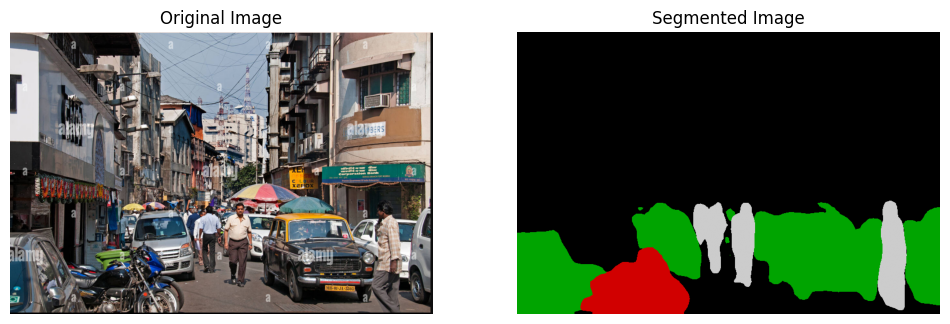

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(image),plt.axis('off'),plt.title('Original Image')
plt.subplot(122),plt.imshow(pred,cmap="nipy_spectral"),plt.axis('off'),plt.title('Segmented Image')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path=cv2.imread('/content/Screenshot 2025-05-30 214800.png')
img=cv2.cvtColor(img_path,cv2.COLOR_BGR2RGB)

In [ ]:
Z=img.reshape((-1,3))
Z=np.float32(Z)

In [ ]:
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=4
_,labels,centers=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
centers=np.uint8(centers)
segmented=centers[labels.flatten()]
segmented_img=segmented.reshape(img.shape)

(<Axes: title={'center': 'Segmented Image'}>,
 (np.float64(-0.5), np.float64(1200.5), np.float64(800.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Segmented Image'))

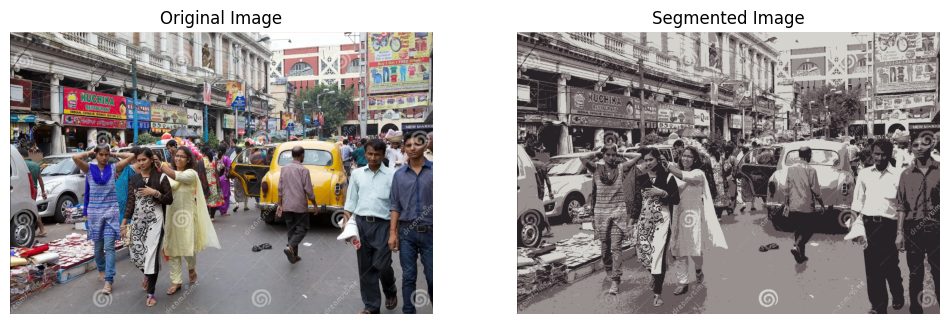

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img),plt.axis('off'),plt.title('Original Image')
plt.subplot(122),plt.imshow(segmented_img),plt.axis('off'),plt.title('Segmented Image')

(<Axes: title={'center': 'Gabor Filter'}>,
 (np.float64(-0.5), np.float64(1200.5), np.float64(800.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Gabor Filter'))

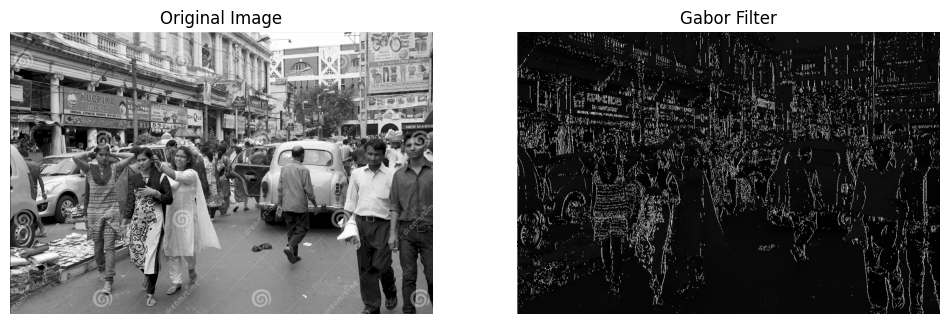

In [ ]:
import cv2
from skimage.filters import gabor
image=cv2.imread('/content/Screenshot 2025-05-30 214800.png',0)
gabor_mag,_=gabor(image,frequency=0.6)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(image,cmap='gray'),plt.axis('off'),plt.title('Original Image')
plt.subplot(122),plt.imshow(gabor_mag,cmap='gray'),plt.axis('off'),plt.title('Gabor Filter')